In [2]:
# super().init {wellname_kind.txt}
class DeclineCurveDependedOnCum(Curve):     # for GOR and WCUT we do noy initiazie curves 
    def __init__(self, **kwargs):
        super().__init__()
        #self.name = None # name of node
        #self.kind = kind # oil, water, gas, liquid
        self.PI = None  # productivity index
        self.Qopen = None # reservoir open flow debit
        self.cum = 0 # cum fluid
        self.Q_prev = kwargs.get("Q_prev", 0) # debit on previous step
        self.Pbhp_prev = kwargs.get("Pbhp_prev", None) # borehole pressure on previous step 
        self.cum_ab_table = kwargs.get("cum_ab_table", None) #{"cum": [], "a" : [], "b" : []} # table of decline curve coefficients for history cum statistics
                           
        
    """        
    def __call__(self, *args, **kwargs):
        return self.func( *args, **kwargs)
    """
    def set_cum_ab_table(self, table): # cum table format {"cum": [],"a" : [],"b" : []}
        self.cum_ab_table = table
        
    def update_cum(self): # update cum in the end of 1 iteration
        self.cum = self.cum + self.Q_prev
        
        
    def update_ipr(self): # method for update IPR curv in every step
        a, b = self.culc_ab(self.cum) # get a,b coefficients in equation PI = a * cum + b
        self.PI = a * self.cum + b  # PI updated
        self.Qopen = self.Q_prev - self.PI * self.Pbhp_prev  # Qopen updated
        
    def culc_ab(self, cum): # method for update PI a,b coefficients in every step
        cum_values = self.cum_ab_table["cum"]
        a_values = self.cum_ab_table["a"]
        b_values = self.cum_ab_table["b"]

        # check out of range cases
        if cum < cum_values[0]:
            return a_values[0], a_values[0]
        if cum > cum_values[-1]:
            return a_values[-1], a_values[-1]

        # function for finding closest value in cum table
        def bisect_left(a, x, lo=0, hi=None):   # function inside method :))
            if lo < 0:
                raise ValueError('lo must be non-negative')
            if hi is None:
                hi = len(a)
            while lo < hi:
                mid = (lo + hi) // 2
                if a[mid] < x:
                    lo = mid + 1
                else:
                    hi = mid
            return lo
        
        
        idx = bisect_left(cum_values, cum) # find index of closest cum value

        # if we have directly equal cum value
        if cum_values[idx] == cum:
            return a_values[idx], b_values[idx]

        # else we do linear interpolation
        cum0, cum1 = cum_values[idx-1], cum_values[idx] 
        a0, a1 = a_values[idx-1], a_values[idx]
        b0, b1 = b_values[idx-1], b_values[idx]

        return a0 + (a1 - a0) * (cum - cum0) / (cum1 - cum0), b0 + (b1 - b0) * (cum - cum0) / (cum1 - cum0)

    
    def func(self, Pbhp): # calculate debit from actual IPR curve
        Q = self.PI * Pbhp + self.Qopen
        return Q
    def inv_func(self, Q):
        Pbhp = (Q - self.Qopen) / self.PI 
        return Pbhp
        
        

# Files for inititialization inflow models

In [3]:
import pandas as pd
import json

In [4]:
df = pd.read_excel(r"D:\PROFILES\Pechko.ka\Desktop\Восток 23\DataFrame_RENAME_NEW.xlsx", sheet_name = "Aprox")

In [9]:
for well in df.name.unique():
    for kind in ['oil', 'gas', 'liq', 'wat']:
        cum_ab_table = df[df.name == well][["a_"+kind, "b_"+kind, "Cumul_"+kind]].rename(columns = {"a_"+kind:"a", "b_"+kind: "b", "Cumul_"+kind: "cum"}).to_dict()
        with open(r"D:\PROFILES\Pechko.ka\Desktop\Восток 23\CumInflowModels"+'\\'+str(well)+"_"+str(kind)+'.txt', 'w') as file:
             file.write(json.dumps(cum_ab_table)) 


# Class test

In [10]:
well = '1079'
kind = 'oil'
with open(r"D:\PROFILES\Pechko.ka\Desktop\Восток 23\CumInflowModels"+'\\'+str(well)+"_"+str(kind)+'.txt', 'r') as file:
        print(file.read() )    
        #file.write(json.loads(cum_ab_table)) 

{"a": {"0": 0.00025012340187754, "1": 0.00025012340187754, "2": 0.00025012340187754, "3": 0.00025012340187754, "4": 0.00025012340187754, "5": 0.00025012340187754, "6": 0.00025012340187754, "7": 0.00025012340187754, "8": 0.00025012340187754, "9": 0.00025012340187754, "10": 0.00025012340187754, "11": 0.00025012340187754, "12": 0.00025012340187754, "13": 0.00025012340187754, "14": 0.00025012340187754, "15": 0.00025012340187754, "16": 0.00025012340187754, "17": 0.00025012340187754, "18": 0.00025012340187754, "19": 0.00025012340187754, "20": 0.00025012340187754, "21": 0.00025012340187754, "22": 0.00025012340187754, "23": 0.00025012340187754, "24": 0.00025012340187754, "25": 0.00025012340187754, "26": 0.00025012340187754, "27": 0.00025012340187754, "28": 0.00025012340187754, "29": 0.00025012340187754, "30": 0.00025012340187754, "31": 0.00025012340187754, "32": 0.00025012340187754, "33": 0.00025012340187754, "34": 0.00025012340187754, "35": 0.00025012340187754, "36": 0.00025012340187754, "37"

In [11]:
l = {"a": {"0": 0.00025012340187754, "1": 0.00025012340187754, "2": 0.00025012340187754, "3": 0.00025012340187754, "4": 0.00025012340187754, "5": 0.00025012340187754, "6": 0.00025012340187754, "7": 0.00025012340187754, "8": 0.00025012340187754, "9": 0.00025012340187754, "10": 0.00025012340187754, "11": 0.00025012340187754, "12": 0.00025012340187754, "13": 0.00025012340187754, "14": 0.00025012340187754, "15": 0.00025012340187754, "16": 0.00025012340187754, "17": 0.00025012340187754, "18": 0.00025012340187754, "19": 0.00025012340187754, "20": 0.00025012340187754, "21": 0.00025012340187754, "22": 0.00025012340187754, "23": 0.00025012340187754, "24": 0.00025012340187754, "25": 0.00025012340187754, "26": 0.00025012340187754, "27": 0.00025012340187754, "28": 0.00025012340187754, "29": 0.00025012340187754, "30": 0.00025012340187754, "31": 0.00025012340187754, "32": 0.00025012340187754, "33": 0.00025012340187754, "34": 0.00025012340187754, "35": 0.00025012340187754, "36": 0.00025012340187754, "37": 0.00025012340187754, "38": 0.00025012340187754, "39": 0.00025012340187754, "40": 0.00025012340187754, "41": 0.00025012340187754, "42": 0.00025012340187754, "43": 0.00025012340187754, "44": 0.00025012340187754, "45": 0.00025012340187754, "46": 0.00025012340187754, "47": 0.00025012340187754, "48": 0.00025012340187754, "49": 0.00025012340187754, "50": 0.00025012340187754, "51": 0.00025012340187754, "52": 0.00025012340187754, "53": 0.00025012340187754, "54": 0.00025012340187754}, "b": {"0": -1.183316661099302, "1": -1.183316661099302, "2": -1.183316661099302, "3": -1.183316661099302, "4": -1.183316661099302, "5": -1.183316661099302, "6": -1.183316661099302, "7": -1.183316661099302, "8": -1.183316661099302, "9": -1.183316661099302, "10": -1.183316661099302, "11": -1.183316661099302, "12": -1.183316661099302, "13": -1.183316661099302, "14": -1.183316661099302, "15": -1.183316661099302, "16": -1.183316661099302, "17": -1.183316661099302, "18": -1.183316661099302, "19": -1.183316661099302, "20": -1.183316661099302, "21": -1.183316661099302, "22": -1.183316661099302, "23": -1.183316661099302, "24": -1.183316661099302, "25": -1.183316661099302, "26": -1.183316661099302, "27": -1.183316661099302, "28": -1.183316661099302, "29": -1.183316661099302, "30": -1.183316661099302, "31": -1.183316661099302, "32": -1.183316661099302, "33": -1.183316661099302, "34": -1.183316661099302, "35": -1.183316661099302, "36": -1.183316661099302, "37": -1.183316661099302, "38": -1.183316661099302, "39": -1.183316661099302, "40": -1.183316661099302, "41": -1.183316661099302, "42": -1.183316661099302, "43": -1.183316661099302, "44": -1.183316661099302, "45": -1.183316661099302, "46": -1.183316661099302, "47": -1.183316661099302, "48": -1.183316661099302, "49": -1.183316661099302, "50": -1.183316661099302, "51": -1.183316661099302, "52": -1.183316661099302, "53": -1.183316661099302, "54": -1.183316661099302}, "cum": {"0": 11491.6448861824, "1": 11514.76771140512, "2": 11537.89043092216, "3": 11560.26719977139, "4": 11583.38973015016, "5": 11605.76599544792, "6": 10752.22959131666, "7": 11469.26784467865, "8": 11628.88791106186, "9": 11652.00980834359, "10": 11673.6398742866, "11": 11696.76159850481, "12": 10899.4504385573, "13": 10605.01002058359, "14": 11719.13738437552, "15": 11322.0775876089, "16": 11742.25876032552, "17": 11179.63320578328, "18": 11764.63413345603, "19": 11032.42014203605, "20": 11787.75525760009, "21": 11810.87620644392, "22": 11833.25115761223, "23": 11856.37156816402, "24": 11878.74576539921, "25": 10462.5436227398, "26": 11901.86541064555, "27": 11924.98480424583, "28": 11945.8666092165, "29": 11968.98548274817, "30": 11991.35842010882, "31": 12014.47684395149, "32": 12036.84926681014, "33": 12059.96719589626, "34": 12083.08493786917, "35": 12105.45667417329, "36": 12128.57384497748, "37": 10315.3328408363, "38": 10172.88526844579, "39": 10025.70451912165, "40": 9878.54556691665, "41": 9736.145922204432, "42": 9589.005392099576, "43": 9446.627448144865, "44": 9299.522091533252, "45": 9166.676815127921, "46": 9023.777838426864, "47": 8221.812543609458, "48": 8325.61622057257, "49": 8433.817514210312, "50": 8891.535845163506, "51": 8543.691605506514, "52": 8771.402793546393, "53": 8652.870379160597, "54": 8121.861671995343}}

In [13]:
import matplotlib.pyplot as plt


TypeError: float() argument must be a string or a number, not 'dict'

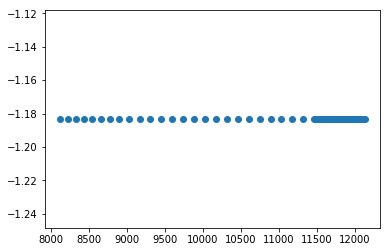

In [19]:
plt.plot(l['cum'].values(), l['b'].values(), 'o')

In [42]:
inflow1079 = DeclineCurveDependedOnCum(Pbhp_prev = 200)

In [47]:
inflow1079.Q_prev = 100

In [49]:
inflow1079.update_cum()

In [52]:
inflow1079.update_ipr()

TypeError: 'NoneType' object is not subscriptable